1

In [344]:

import numpy as np
np.random.seed(1)

n = 70
lower = np.array([-2.5, -1.5])
upper = np.array([1.5, 2.5])
x = np.column_stack((np.random.uniform(lower[0], upper[0], size=n),
np.random.uniform(lower[1], upper[1], size=n)))

def f(x):
    return 20 + x[:,0]**2 + x[:,1]**2 - 10*(np.cos(2*np.pi*x[:,0]) + np.cos(2*np.pi*x[:,1]))

y = f(x)

2

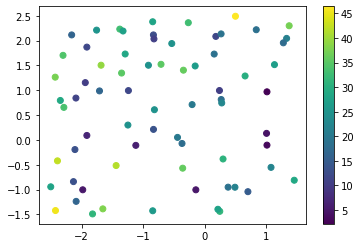

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

np.random.seed(1)
n = 70
lower = [-2.5,-1.5]
upper = [1.5,2.5]
x = np.column_stack((np.random.uniform(lower[0], upper[0], n), np.random.uniform(lower[1], upper[1], n)))
f = lambda x: 20 + x[:,0]**2 + x[:,1]**2 - 10*(np.cos(2*np.pi*x[:,0]) + np.cos(2*np.pi*x[:,1]))
y = f(x)

df = pd.DataFrame({'x.1': x[:, 0], 'x.2': x[:, 1], 'y': y})

# create a color map using the viridis colors
cmap = cm.viridis

# plot the points
plt.scatter(x=df['x.1'], y=df['x.2'], c=df['y'], cmap=cmap)
plt.colorbar()
plt.show()


3

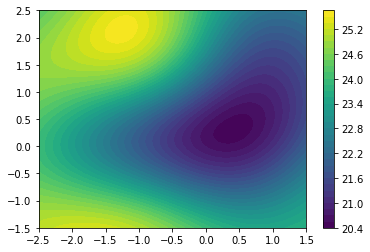

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVR
import seaborn as sns

np.random.seed(1)

model = SVR(kernel='rbf', gamma='auto')
model.fit(x, y)

nplot_dim = 100

xplot = np.meshgrid(np.linspace(lower[0], upper[0], nplot_dim), 
                    np.linspace(lower[1], upper[1], nplot_dim))
xplot_flat = np.column_stack([xplot[0].ravel(), xplot[1].ravel()])
yplot = model.predict(xplot_flat)

df = pd.DataFrame({'x.1': xplot[0].ravel(), 'x.2': xplot[1].ravel(), 'y': yplot})
cmap = ListedColormap(sns.color_palette("viridis", n_colors=256).as_hex())

plt.contourf(df['x.1'].values.reshape((nplot_dim, nplot_dim)),
             df['x.2'].values.reshape((nplot_dim, nplot_dim)),
             df['y'].values.reshape((nplot_dim, nplot_dim)),
             levels=50,
             cmap=cmap)

plt.colorbar()
plt.show()


4

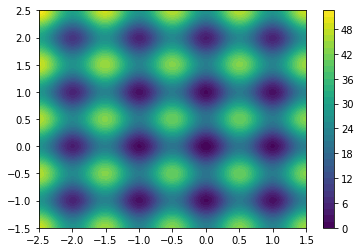

In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

np.random.seed(1)

nplot_dim = 100
lower = [-2.5, -1.5]
upper = [1.5, 2.5]

xplot = np.meshgrid(np.linspace(lower[0], upper[0], nplot_dim), 
                    np.linspace(lower[1], upper[1], nplot_dim))
xplot_flat = np.column_stack([xplot[0].ravel(), xplot[1].ravel()])

def f(x):
    return 20 + x[:,0]**2 + x[:,1]**2 - 10*(np.cos(2*np.pi*x[:,0]) + np.cos(2*np.pi*x[:,1]))

yplot2 = f(xplot_flat)
df = pd.DataFrame({'x.1': xplot[0].ravel(), 'x.2': xplot[1].ravel(), 'y': yplot2})
cmap = ListedColormap(sns.color_palette("viridis", n_colors=256).as_hex())

plt.contourf(df['x.1'].values.reshape((nplot_dim, nplot_dim)),
             df['x.2'].values.reshape((nplot_dim, nplot_dim)),
             df['y'].values.reshape((nplot_dim, nplot_dim)),
             levels=50,
             cmap=cmap)

plt.colorbar()
plt.show()


5

In [348]:
error = model.score(x, y)
obj = model.dual_coef_

print("Fehlerwert:", error)
print("Objektivwert:", obj)

Fehlerwert: 0.056599755929297335
Objektivwert: [[-1.         -1.          1.          1.         -1.         -1.
  -0.70835021 -1.         -0.07387948  1.         -1.         -1.
   1.         -1.          1.         -1.         -1.          1.
  -1.         -1.         -1.          1.          1.         -1.
  -1.          0.78222969 -1.          1.          1.         -1.
  -1.          1.         -1.         -1.         -1.         -1.
   1.         -1.          1.          1.          1.         -1.
   1.          1.         -1.          1.          1.          1.
   1.         -1.          1.          1.          1.          1.
   1.         -1.         -1.         -1.          1.         -1.
   1.          1.          1.          1.          1.         -1.
  -1.         -1.          1.        ]]


6

In [349]:
from sklearn.metrics.pairwise import rbf_kernel


# Define the data
np.random.seed(1)
x = np.random.uniform(low=-3, high=3, size=70)
y = np.sin(x) + np.random.normal(scale=0.1, size=70)

# Define the model
model = SVR(kernel='rbf', epsilon=0, C=1e-1, tol=0.1)

# Fit the model to the data
X = x.reshape(-1, 1)
model.fit(X, y)

# Get the model attributes
dual_coefficients = model.dual_coef_
intercept = model.intercept_

# Print the error and objective function values
print("Error:", model.score(X, y))

# Compute the kernel matrix
support_vectors = model.support_vectors_
K = rbf_kernel(support_vectors, support_vectors)

# Compute the objective function
dual_coefficients = model.dual_coef_.ravel()
obj = 0.5 * np.dot(dual_coefficients, np.dot(K, dual_coefficients))
obj -= np.sum(dual_coefficients)
print("Objective function:", obj)



Error: 0.9841626554731974
Objective function: 1.158705366679624


7

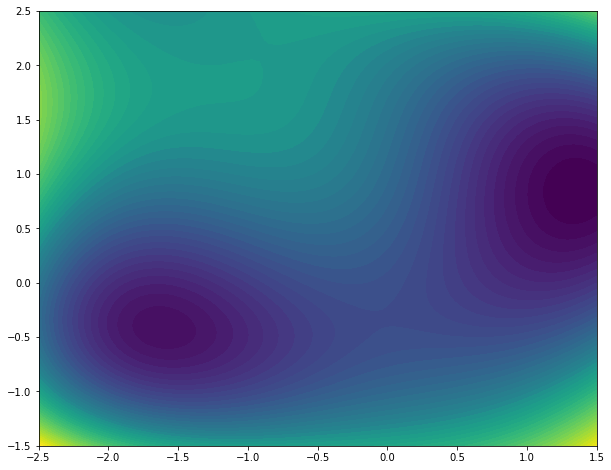

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVR
from matplotlib.colors import ListedColormap

np.random.seed(1)
n = 70
lower = [-2.5,-1.5]
upper = [1.5,2.5]
x = np.hstack([np.random.uniform(lower[0], upper[0], size=n).reshape(-1,1), 
               np.random.uniform(lower[1], upper[1], size=n).reshape(-1,1)])
f = lambda x: 20 + x[:,0]**2 + x[:,1]**2 - 10*(np.cos(2*np.pi*x[:,0]) + np.cos(2*np.pi*x[:,1]))
y = f(x)


model = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=.1)
model.fit(x, y)

nplot_dim = 100
xplot = np.array(np.meshgrid(np.linspace(lower[0], upper[0], nplot_dim), np.linspace(lower[1], upper[1], nplot_dim))).T.reshape(-1,2)
yplot = model.predict(xplot)

df = pd.DataFrame(np.hstack([xplot, yplot.reshape(-1,1)]), columns=['x.1', 'x.2', 'y'])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
levels = np.linspace(np.min(df['y']), np.max(df['y']), 50)
cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, len(levels))))
ax.tricontourf(df['x.1'], df['x.2'], df['y'], levels=levels, cmap=cmap)
plt.show()


8

In [351]:
import numpy as np
from sklearn.svm import SVR

def f(x):
    x1, x2 = x[:, 0], x[:, 1]
    return 20 + x1**2 + x2**2 - 10*(np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2))

def uniformRandomSearch(fun, lower, upper, control={}):
    con = {'funEvals': 200} # default limit on function evaluations
    con.update(control)
    control = con  
    npar = len(lower) # number of parameters
    xtest = np.random.uniform(low=lower, high=upper, size=(control['funEvals'], npar))
    ytest = np.array([fun(xi) for xi in xtest])
    best_index = np.argmin(ytest)
    print(xtest[best_index])
    return {'xbest': xtest[best_index], 'ybest': ytest[best_index], 'count': xtest.shape[0]}

def fun(pars):
    model = SVR(epsilon=10**pars[0], C=10**pars[1], tol=10**pars[2])
    model.fit(x, y)
    return model.score(x, y)

def afun(x):
    
    return fun(x)


x = np.random.uniform(low=-1, high=1, size=(100, 2))
y = f(x)

np.random.seed(123)
res = uniformRandomSearch(fun=afun, lower=[-8, 0, -8], upper=[0, 4, -3], control={'funEvals': 100})
print(res)


(70, 2)
[-3.82773552  0.01075226 -3.0582729 ]
{'xbest': array([-3.82773552,  0.01075226, -3.0582729 ]), 'ybest': 0.07034825084196994, 'count': 100}


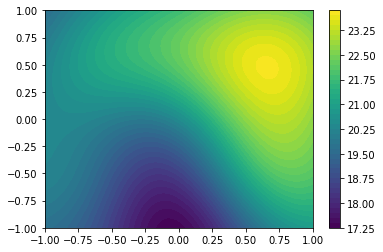

In [352]:
# Set random seed for reproducibility
np.random.seed(1)

# Define the SVM model with the optimal hyperparameters found through random search
model = SVR(epsilon=10**res['xbest'][0], C=10**res['xbest'][1], tol=10**res['xbest'][2])
model.fit(x, y)

# Generate predicted values for a grid of points
x1, x2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
xplot = np.vstack((x1.flatten(), x2.flatten())).T
yplot = model.predict(xplot)

# Create a data frame with the predicted values for plotting
df = pd.DataFrame({'x.1': xplot[:, 0], 'x.2': xplot[:, 1], 'y': yplot})

# Plot the contours of the predicted values
plt.contourf(x1, x2, yplot.reshape(x1.shape), levels=50, cmap='viridis')
plt.colorbar()

# Show the plot
plt.show()
